In [63]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [64]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br,total
0,S1,1390000.0,0.0000,1.661640e+05,1560000.0,2900000.0,0.0000,1.661640e+05,3060000.0,4620000.0
1,S2,1390000.0,0.0000,1.661640e+05,1560000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,8930000.0
2,S3,1390000.0,0.0000,1.661640e+05,1560000.0,11400000.0,933516.8186,4.430000e+06,16700000.0,18300000.0
3,S4,4850000.0,314891.7243,1.590000e+06,6750000.0,2900000.0,0.0000,1.661640e+05,3060000.0,9810000.0
4,S5,1390000.0,0.0000,1.661640e+05,1560000.0,11400000.0,933516.8186,4.430000e+06,16700000.0,18300000.0
5,S6,11100000.0,314891.7243,1.590000e+06,13000000.0,3470000.0,314891.7243,1.590000e+06,5370000.0,18400000.0
6,S7,4850000.0,314891.7243,1.590000e+06,6750000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,14100000.0
7,S8,11100000.0,314891.7243,1.590000e+06,13000000.0,3470000.0,314891.7243,1.590000e+06,5370000.0,18400000.0
8,S9,4850000.0,314891.7243,1.590000e+06,6750000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,14100000.0
9,S10,32600000.0,933516.8186,4.430000e+06,38000000.0,5740000.0,933516.8186,4.430000e+06,11100000.0,49100000.0


In [65]:
df_cost = df_cost.set_index('Strategy')

In [66]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br', 'total'], axis=1)

In [67]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1390000.0,0.0000,1.661640e+05,2900000.0,0.0000,1.661640e+05
S2,1390000.0,0.0000,1.661640e+05,5460000.0,314891.7243,1.590000e+06
S3,1390000.0,0.0000,1.661640e+05,11400000.0,933516.8186,4.430000e+06
S4,4850000.0,314891.7243,1.590000e+06,2900000.0,0.0000,1.661640e+05
S5,1390000.0,0.0000,1.661640e+05,11400000.0,933516.8186,4.430000e+06
S6,11100000.0,314891.7243,1.590000e+06,3470000.0,314891.7243,1.590000e+06
S7,4850000.0,314891.7243,1.590000e+06,5460000.0,314891.7243,1.590000e+06
S8,11100000.0,314891.7243,1.590000e+06,3470000.0,314891.7243,1.590000e+06
S9,4850000.0,314891.7243,1.590000e+06,5460000.0,314891.7243,1.590000e+06


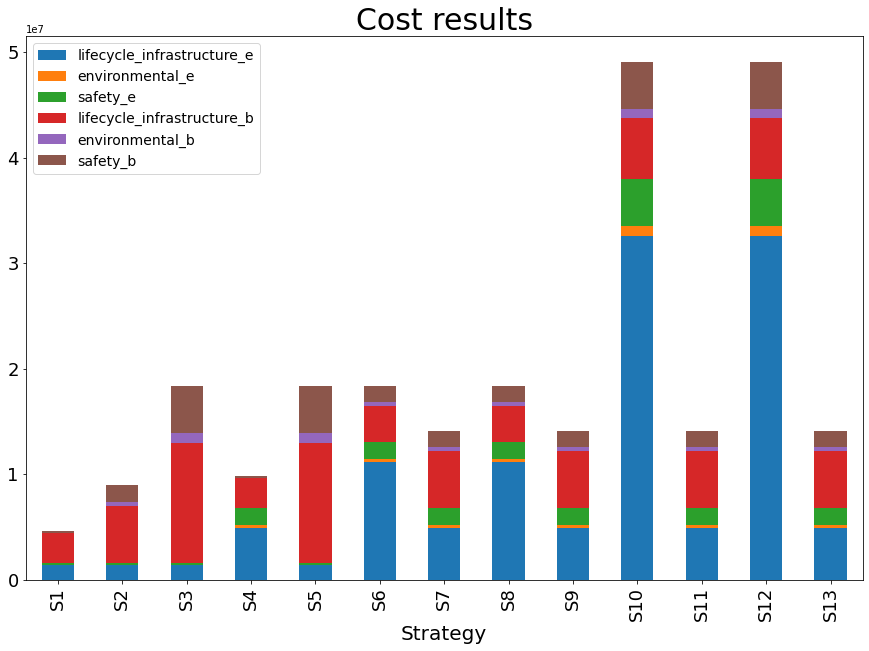

In [69]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [70]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,S1,0.000000,1.190000e+09,0.000000,2620000.0
1,S2,0.000000,1.190000e+09,1020.823948,1910000.0
2,S3,0.000000,1.190000e+09,2220.392903,1250000.0
3,S4,1020.823948,8.650000e+08,0.000000,2620000.0
4,S5,2220.392903,5.670000e+08,0.000000,2620000.0
5,S6,1020.823948,8.650000e+08,1020.823948,1910000.0
6,S7,1020.823948,8.650000e+08,1020.823948,1910000.0
7,S8,1020.823948,8.650000e+08,1020.823948,1910000.0
8,S9,1020.823948,8.650000e+08,1020.823948,1910000.0
9,S10,2220.392903,5.670000e+08,2220.392903,1250000.0


In [71]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [72]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
S1,0.000000,1.190000e+09,0.000000,2620000.0
S2,0.000000,1.190000e+09,1020.823948,1910000.0
S3,0.000000,1.190000e+09,2220.392903,1250000.0
S4,1020.823948,8.650000e+08,0.000000,2620000.0
S5,2220.392903,5.670000e+08,0.000000,2620000.0
S6,1020.823948,8.650000e+08,1020.823948,1910000.0
S7,1020.823948,8.650000e+08,1020.823948,1910000.0
S8,1020.823948,8.650000e+08,1020.823948,1910000.0
S9,1020.823948,8.650000e+08,1020.823948,1910000.0


In [73]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [74]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
S1,1.190000e+09,2620000.0
S2,1.190000e+09,1910000.0
S3,1.190000e+09,1250000.0
S4,8.650000e+08,2620000.0
S5,5.670000e+08,2620000.0
S6,8.650000e+08,1910000.0
S7,8.650000e+08,1910000.0
S8,8.650000e+08,1910000.0
S9,8.650000e+08,1910000.0


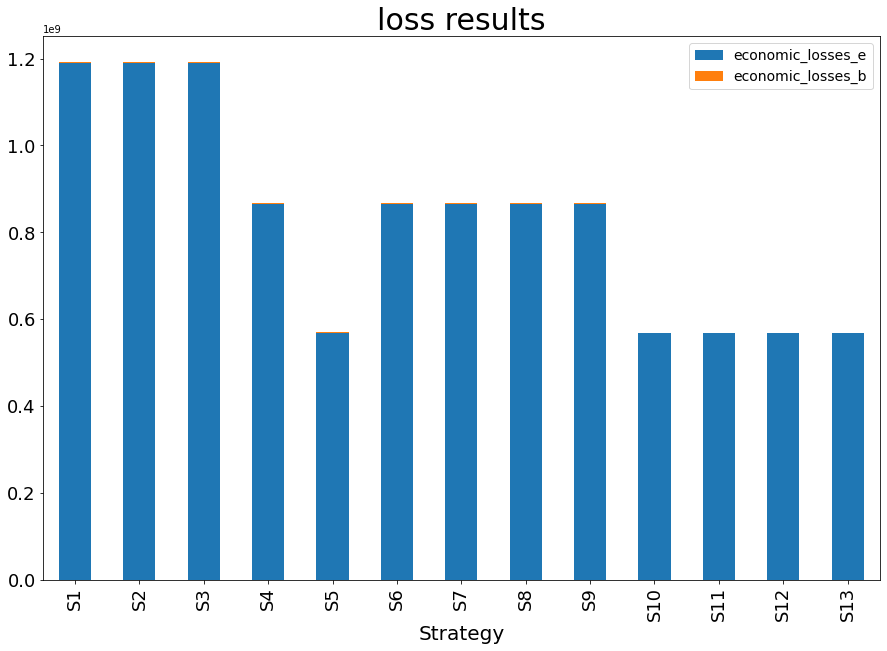

In [75]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['economic_losses_e','economic_losses_b'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss.png')

In [76]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [77]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
S1,0.000000,0.000000
S2,0.000000,1020.823948
S3,0.000000,2220.392903
S4,1020.823948,0.000000
S5,2220.392903,0.000000
S6,1020.823948,1020.823948
S7,1020.823948,1020.823948
S8,1020.823948,1020.823948
S9,1020.823948,1020.823948


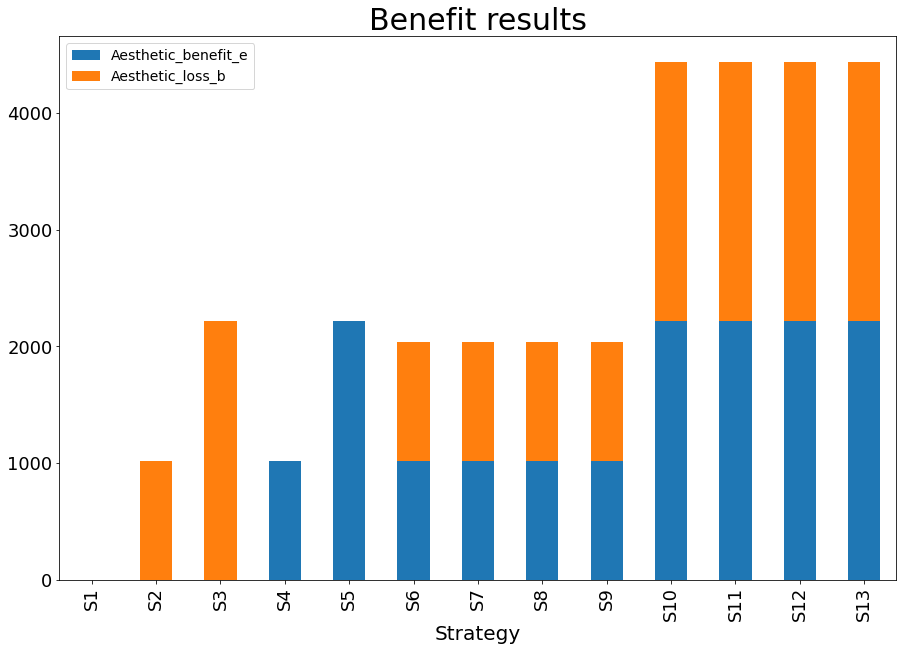

In [78]:
# plotting benefit results
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic_benefit_e','Aesthetic_loss_b'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit.png')

In [127]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure cost,environmental_restoration cost,safety cost,economic_losses,aesthetic_benefit,total
0,S13,-10300000.0,-6.297834e+05,-3.180000e+06,-5.680000e+08,4440.785806,-5.820000e+08
1,S11,-10300000.0,-6.297834e+05,-3.180000e+06,-5.680000e+08,4440.785806,-5.820000e+08
2,S5,-12800000.0,-9.335168e+05,-4.596164e+06,-5.700000e+08,2220.392903,-5.880000e+08
3,S12,-38300000.0,-1.867034e+06,-8.860000e+06,-5.680000e+08,4440.785806,-6.170000e+08
4,S10,-38300000.0,-1.867034e+06,-8.860000e+06,-5.680000e+08,4440.785806,-6.170000e+08
5,S4,-7750000.0,-3.148917e+05,-1.756164e+06,-8.680000e+08,1020.823948,-8.780000e+08
6,S9,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.810000e+08
7,S7,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.810000e+08
8,S8,-14600000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.850000e+08
9,S6,-14600000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.850000e+08


In [128]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [129]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure cost,environmental_restoration cost,safety cost,economic_losses,aesthetic_benefit,total
Strategy,,,,,,
S13,-10300000.0,-6.297834e+05,-3.180000e+06,-5.680000e+08,4440.785806,-5.820000e+08
S11,-10300000.0,-6.297834e+05,-3.180000e+06,-5.680000e+08,4440.785806,-5.820000e+08
S5,-12800000.0,-9.335168e+05,-4.596164e+06,-5.700000e+08,2220.392903,-5.880000e+08
S12,-38300000.0,-1.867034e+06,-8.860000e+06,-5.680000e+08,4440.785806,-6.170000e+08
S10,-38300000.0,-1.867034e+06,-8.860000e+06,-5.680000e+08,4440.785806,-6.170000e+08
S4,-7750000.0,-3.148917e+05,-1.756164e+06,-8.680000e+08,1020.823948,-8.780000e+08
S9,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.810000e+08
S7,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.810000e+08
S8,-14600000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896,-8.850000e+08


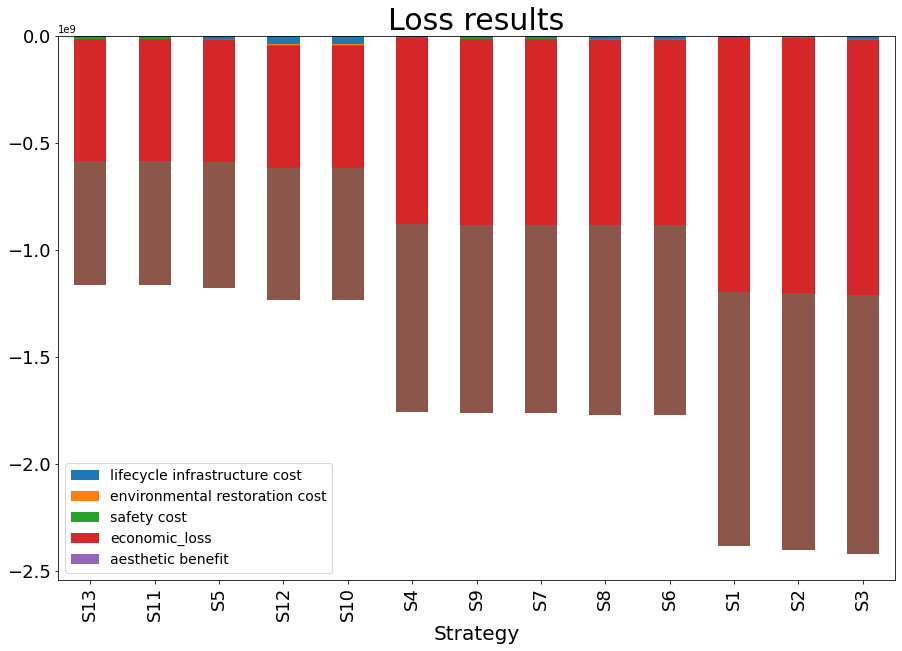

In [118]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png')

In [124]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['economic_losses', 'aesthetic_benefit','total'], axis=1)

In [125]:
df_npv_cost

,lifecycle_infrastructure cost,environmental_restoration cost,safety cost
Strategy,,,
S13,-10300000.0,-6.297834e+05,-3.180000e+06
S11,-10300000.0,-6.297834e+05,-3.180000e+06
S5,-12800000.0,-9.335168e+05,-4.596164e+06
S12,-38300000.0,-1.867034e+06,-8.860000e+06
S10,-38300000.0,-1.867034e+06,-8.860000e+06
S4,-7750000.0,-3.148917e+05,-1.756164e+06
S9,-10300000.0,-6.297834e+05,-3.180000e+06
S7,-10300000.0,-6.297834e+05,-3.180000e+06
S8,-14600000.0,-6.297834e+05,-3.180000e+06


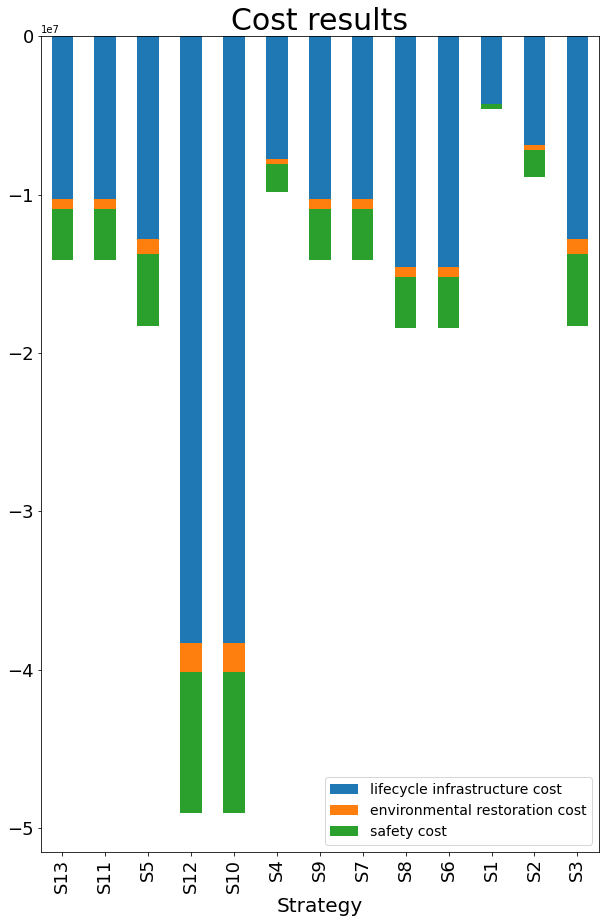

In [123]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated.png')

In [102]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'aesthetic_benefit','total'], axis=1)

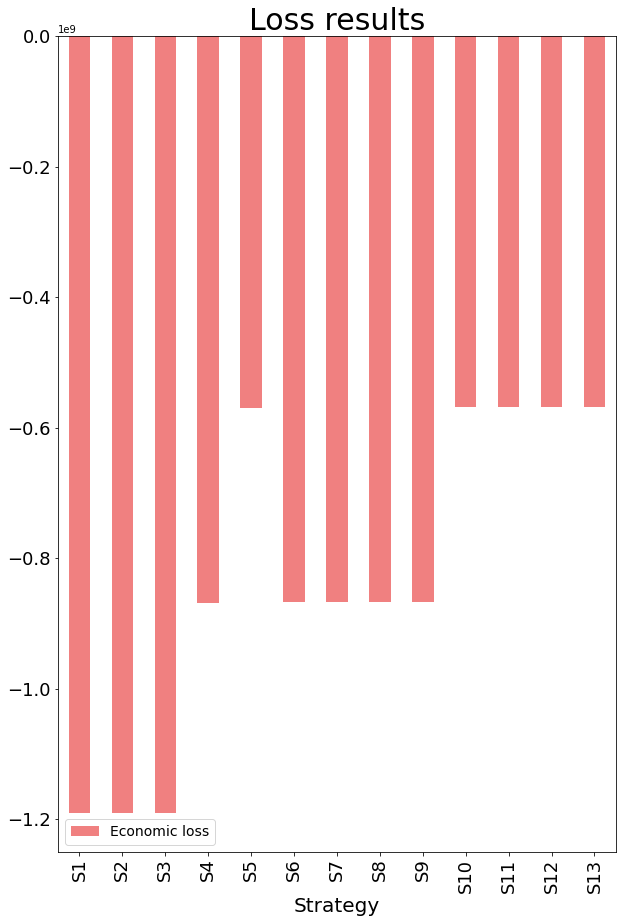

In [104]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Economic loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated.png')

In [105]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'economic_losses','total'], axis=1)

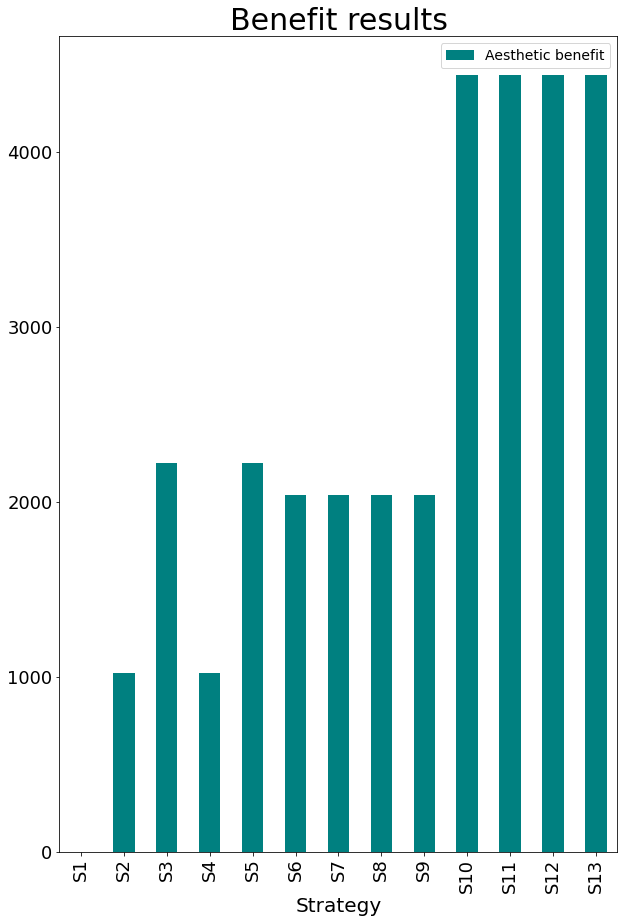

In [106]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated.png')

In [143]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure cost,environmental_restoration cost,safety cost,economic_losses,aesthetic_benefit,total
0,S1,0.0,0.000000e+00,0.000,0.0,0.000000,0.0
1,S2,-2560000.0,-3.148917e+05,-1423836.001,710000.0,1020.823948,-3590000.0
2,S3,-8510000.0,-9.335168e+05,-4263836.001,1370000.0,2220.392903,-12300000.0
3,S4,-3460000.0,-3.148917e+05,-1423836.001,325000000.0,1020.823948,320000000.0
4,S5,-8510000.0,-9.335168e+05,-4263836.001,623000000.0,2220.392903,609000000.0
5,S6,-10300000.0,-6.297834e+05,-2847672.002,326000000.0,2041.647896,312000000.0
6,S7,-6010000.0,-6.297834e+05,-2847672.002,326000000.0,2041.647896,317000000.0
7,S8,-10300000.0,-6.297834e+05,-2847672.002,326000000.0,2041.647896,312000000.0
8,S9,-6010000.0,-6.297834e+05,-2847672.002,326000000.0,2041.647896,317000000.0
9,S10,-34000000.0,-1.867034e+06,-8527672.002,624000000.0,4440.785806,580000000.0


In [144]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

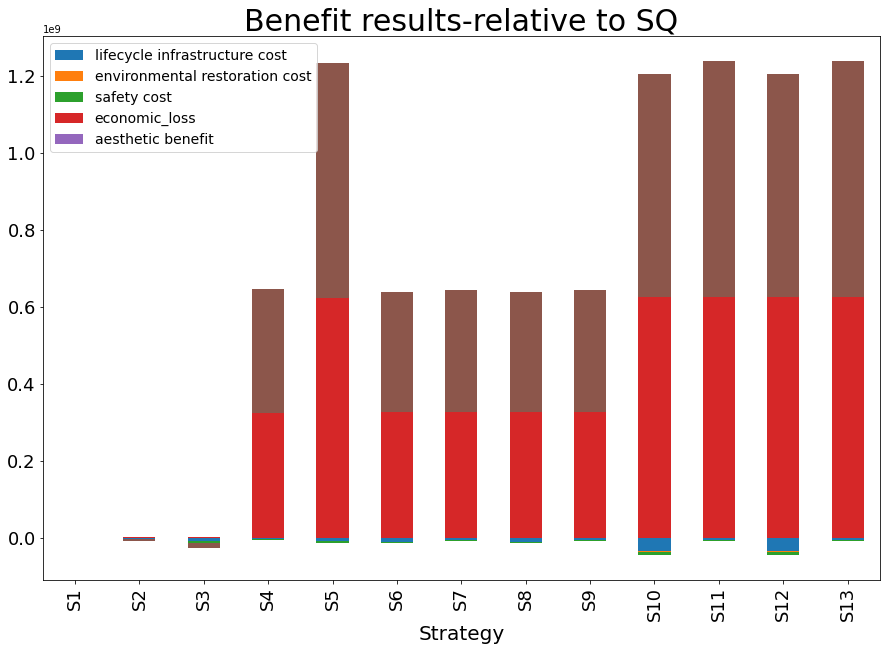

In [145]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png')

In [146]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit','total'], axis=1)

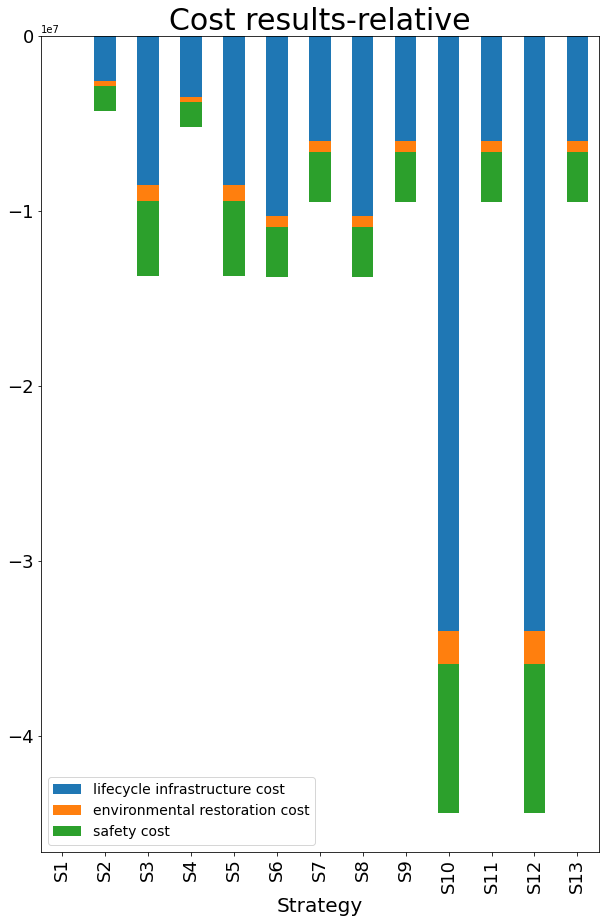

In [147]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results-relative", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated-relative.png')

In [148]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'aesthetic_benefit','total'], axis=1)

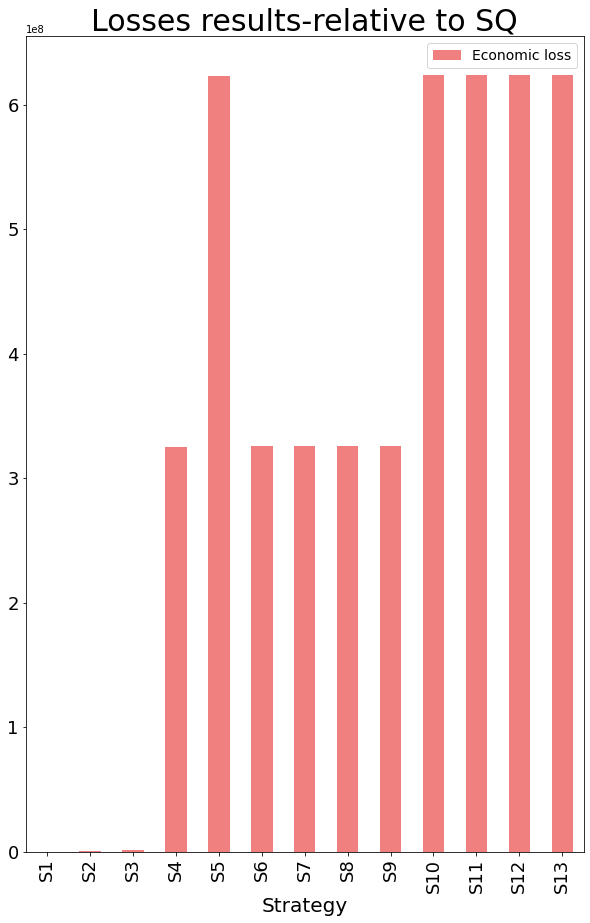

In [149]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Losses results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Economic loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png')

In [141]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'economic_losses','total'], axis=1)

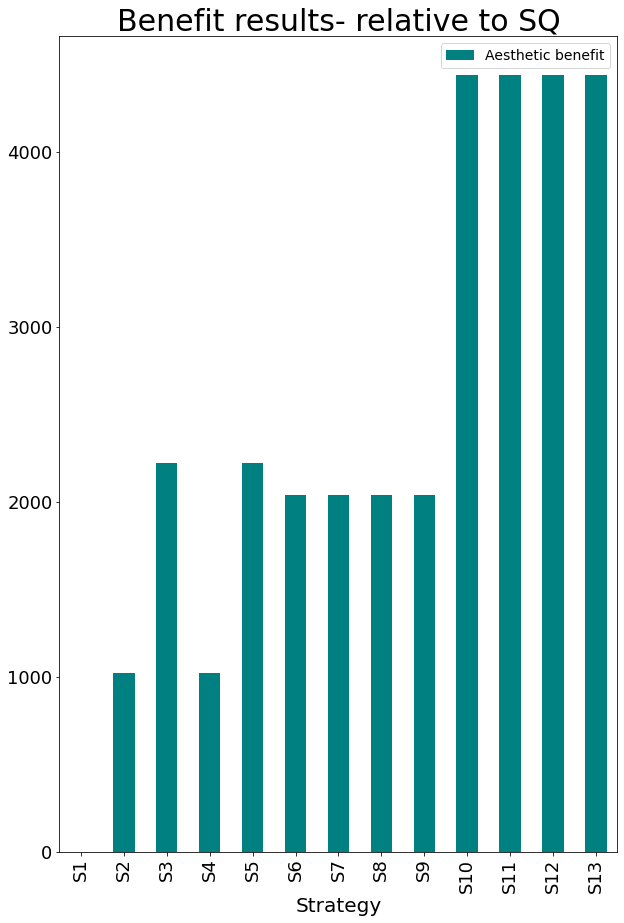

In [142]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results- relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png')

In [160]:
with open(r'../../results/outcomes/S1-under-proportion.csv') as S1_under_prop:
    df_S1_under_prop=pd.read_csv(S1_under_prop)
df_S1_under_prop['average_under_pro']=df_S1_under_prop['el_underground_proportion']+df_S1_under_prop['br_underground_proportion']/2
df_S1_under_prop=df_S1_under_prop.drop(['el_underground_proportion', 'aesthetic_benefit','total'], axis=1)

,el_underground_proportion,br_underground_proportion,average_under_pro
0,0.338376,0.338376,0.507564
1,0.374049,0.338376,0.543237
2,0.378199,0.338376,0.547387
3,0.385539,0.338376,0.554727
4,0.399104,0.338376,0.568292
5,0.417152,0.338376,0.586340
6,0.433349,0.338376,0.602537
7,0.446036,0.338376,0.615224
8,0.467324,0.338376,0.636513
9,0.492365,0.338376,0.661553
